# Get started with creating Speaker Recognition Project

To do:
* Normalize signal by energy
* Maybe crop end of files if noise. Apply smoothening filter if air conditioning is present.

## Convert m4a files to wav

In [ ]:
# ! pip install librosa #didnt work
# ! pip install ffmpeg #didnt work
# ! pip install pathlib
# ! pip install ffprobe
# ! pip install pydub
# ! pip install pandas

In [2]:
from pathlib import Path
from glob import glob

data_folder = Path().resolve() / "Audio Files"

twelve_test_files = glob(f'{data_folder}\Twelve Test\*.m4a')
twelve_train_files = glob(f'{data_folder}\Twelve Train\*.m4a')
zero_test_files = glob(f'{data_folder}\Zero Test\*.m4a')
zero_train_files = glob(f'{data_folder}\Zero Train\*.m4a')

In [10]:
from pydub import AudioSegment

for file_group in [twelve_test_files, twelve_train_files, zero_test_files, zero_train_files]:
  for file in file_group:
    sound = AudioSegment.from_file(file, format='m4a')
    sound.export(f'{file[:-4]}.wav', format='wav')


## Read in Wave files

In [1]:
from pathlib import Path
from glob import glob

data_folder = Path().resolve() / "Audio Files"

twelve_test_files = glob(f'{data_folder}\Twelve Test\*.wav')
twelve_train_files = glob(f'{data_folder}\Twelve Train\*.wav')
zero_test_files = glob(f'{data_folder}\Zero Test\*.wav')
zero_train_files = glob(f'{data_folder}\Zero Train\*.wav')

In [2]:
from scipy.io import wavfile
import numpy as np

# Specify the path to the WAV file
file_path = twelve_test_files[0]

# Read the WAV file and store the sample rate and audio data
sample_rate, audio_data = wavfile.read(file_path)

# Convert the audio data to a NumPy array
audio_array = np.array(audio_data)

# Print the sample rate and shape of the audio array
print("Sample Rate:", sample_rate)
print("Audio Array Shape:", audio_array.shape)

Sample Rate: 48000
Audio Array Shape: (73728,)


In [15]:
from IPython.display import Audio

# Play the audio array
Audio(audio_array, rate=sample_rate)

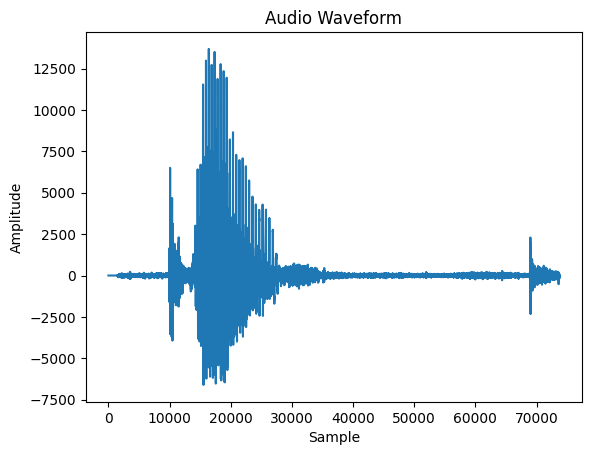

In [3]:
import matplotlib.pyplot as plt

# Plot the waveform
plt.plot(audio_array)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()


## Frame Blocking

In [4]:
from librosa.feature import mfcc 
# import matplotlib.pyplot as plt

N = 256  # Number of samples per frame # Change to 30ms window N = 0.03 * sample_rate
M = 100  # Number of samples between the start of each frame # Change to 18ms shift M = 0.01 * sample_rate
K = 20  # Number of Mel filters

speaker_mfccs = np.zeros((1 + (len(audio_array) - N + 1)//M, K))    # (samples, dimensions of a given sample)
print(speaker_mfccs.shape)
#mel_weights = np.zeros((K, N//2 + 1)) # Mel filter weights for getting mel spectrum

# freq = np.linspace(0, sample_rate/2, N//2 + 1)  # Frequency axis up to the Nyquist frequency

# Iterate over the audio array with the moving window
for i, sample in enumerate(range(0, len(audio_array) - N + 1, M)):
#for i in [800]:
    frame = audio_array[sample:sample+N]

    # Apply windowing to the frame
    windowed_frame = frame * np.hamming(N)  # Hamming window

    # Perform the Fourier transform
    X = np.fft.fft(windowed_frame)[:N//2 + 1]

    # plt.plot(freq, np.abs(X))
    # plt.xlabel('Frequency [Hz]')
    # plt.ylabel('Magnitude')
    # plt.title('Magnitude Spectrum')
    # plt.show()
    
    # Create Mel-Spectrum
    # Compute the MFCC coefficients #speaker_mfccs[i,:]
    speaker_mfccs[i,:] = np.transpose(mfcc(y=windowed_frame, sr=sample_rate, n_mfcc=K)) #S=librosa.power_to_db(np.abs(X)), n_mfcc=13)
    # Instead, could call function with S = librosa.feature.melspectrogram(windowed_frame, sr=sample_rate, n_mels=K, fmax=sample_rate/2))

    # Print the shape of the MFCC coefficients
    # print("MFCC Coefficients Shape:", mfcc_coef.shape)
    # print(type(mfcc_coef))
    
    

(735, 20)


C:\Users\randa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=256
  warnings.warn(


In [5]:
from codebook import generate_codebook

# Generate a codebook for the MFCC coefficients
codebook = generate_codebook(speaker_mfccs, 32, verbose=False)

